# Analyzing Marketing Campaigns with pandas

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [45]:
# Importing the dataset

# Import marketing.csv 
marketing = pd.read_csv('marketing.csv')

## Examining the data

In [46]:
# Print the first five rows of the DataFrame
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [47]:
# Print the statistics of all columns
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [48]:
# Check column data types and non-missing values
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB
None


### Updating the data type of a column
Pandas and Python have special functionalities around manipulating data types that can make your analysis easier and more robust, such as concatenating strings and summing boolean values. However, this functionality is only possible if columns are stored as the intended data type.

In [49]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [50]:
# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')
print(marketing['is_retained'].dtype)

bool


### Adding new columns
Adding new columns that derive information from existing data or based on domain knowledge is known as **Feature Engineering**. Even in relatively simple datasets, there are always new characteristics you could pull out to create a more in-depth analysis.<br>
- Add a new column, `channel_code`, which maps the values in the `subscribing_channel` column to a numeric scale using the channel_dict dictionary.
- Add a new column, `is_correct_lang`, which is *'Yes'* if the user was shown the ad in their preferred language, *'No'* otherwise.

In [51]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [52]:
# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

### Date columns
- Currently, the date columns in the `marketing` DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.
- Create a day of week column from `'date_subscribed'` using `dt.dayofweek`.



In [53]:
# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
                        parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

In [54]:
# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [55]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


## Initial exploratory analysis
### Daily marketing reach by channel
This is crucial to understand how effective our marketing efforts have been over the past month.

In [56]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


### Visualizing daily marketing reach

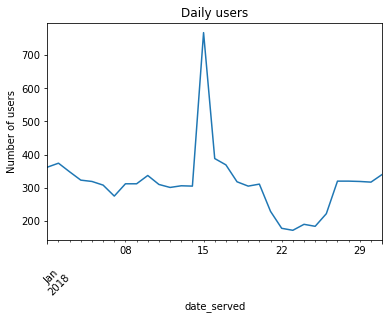

In [57]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()


Much like in daily users who view marketing assets, there's a large peak around the time when an email blast goes out.

## Exploratory Analysis & Summary Statistics

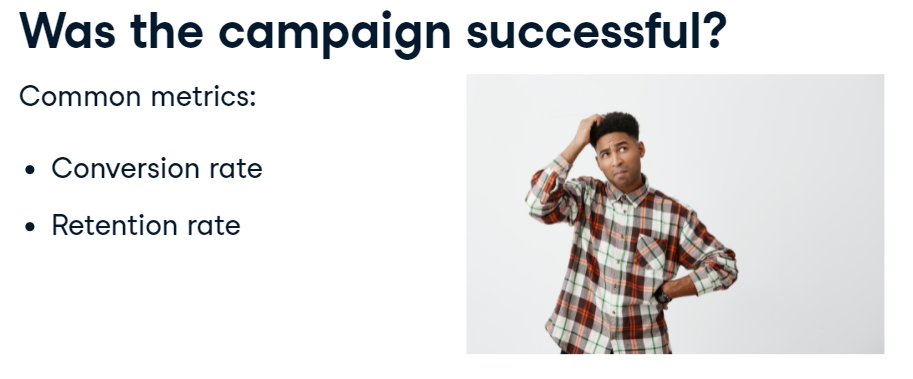


**Conversion rate** is typically the most important metric. It is one of the best ways to determine how effective a marketing team was at gaining new customers.It is the percentage of the users who saw our marketing assets and subsequently became subscribers.
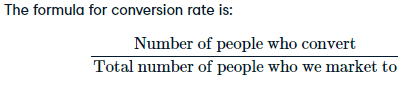


### Calculating conversion rate

In [58]:
# Calculate the number of people we marketed to
total = marketing['user_id'].nunique()

# Calculate the number of people who subscribed
subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# Calculate the conversion rate
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


Is this a good conversion rate? This will depend heavily on the business. There is no particular number that all marketing teams are trying to reach. It helps to look at historical data to determine whether a conversion rate is what you would expect.

### Calculating retention rate
Retention rate, or the number of remaining subscribers from the users who converted to your product. This can give you a sense of whether your marketing campaign converted subscribers who were actually interested in the product.

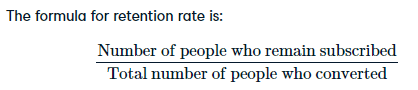

In [59]:
# Calculate the number of subscribers
total_subscribers = marketing[marketing.converted == True].user_id.nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing.is_retained == True].user_id.nunique()

# Calculate the retention rate
retention_rate = retained / total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


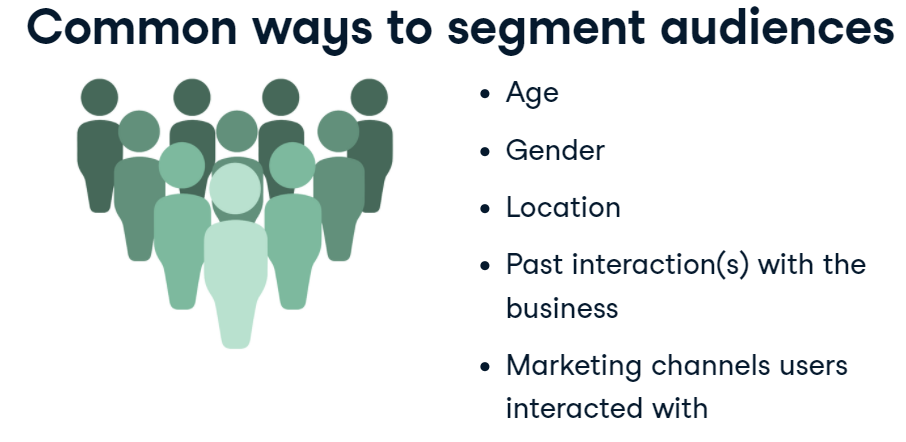

### Comparing language conversion rate (I)

In [60]:
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English']

# Calculate the total number of English speaking users
total = english_speakers.user_id.nunique()

# Calculate the number of English speakers who converted
subscribers = english_speakers[english_speakers.converted == True].user_id.nunique()

# Calculate conversion rate
conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 12.92 %


### Comparing language conversion rate (II)

In [64]:
# Group by language_displayed and count unique users
total = marketing.groupby('language_displayed').user_id.nunique()

# Group by language_displayed and sum conversions
subscribers = marketing[marketing.converted== True].groupby('language_displayed').user_id.nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers / total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


### Aggregating by date
The marketing team wants to know whether there is any difference in the conversion rate based on when in the month, your users saw an ad.

In [67]:
# Group by date_served and count unique users
total = marketing.groupby('date_served').user_id.nunique()

# Group by date_served and count unique converted users
subscribers = marketing[marketing.converted == True].groupby('date_served').user_id.nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate.head())

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64


### Visualize conversion rate by language
A strong foundation in data visualization is a key aspect to conveying results, especially when engaging with people who are not as comfortable interpreting data on their own.

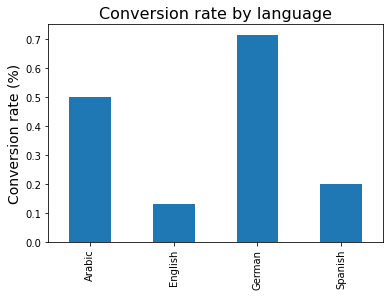

In [69]:
# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language', size = 16)
plt.xlabel('Language', size= 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('', size = 14)

# Display the plot
plt.show()

### Creating daily conversion rate DataFrame
Looking at the daily conversion rate is crucial to contextualize whether the conversion rate on a particular day was good or bad. Additionally, looking at conversion rate over time can help to surface trends such as a conversion rate that appears to be going down over time. These kinds of trends are crucial to identify for your marketing stakeholders as early as possible.

In [73]:
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total
daily_conversion_rate.head(5)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
Name: user_id, dtype: float64

### Setting up our data to visualize daily conversion

In [74]:
# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

### Visualize daily conversion rate

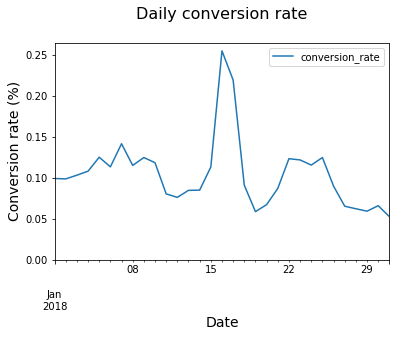

In [75]:
# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

The conversion rate is relatively steady except for one day in January

### Marketing channels across age groups
Some marketing stakeholders want to know if their marketing channels are reaching all users equally or if some marketing channels are serving specific age demographics.

Within a marketing team, it is common to get requests that require quick analysis and visualization. The better you are at visualizing the results, the more likely that you will effectively communicate your findings to your stakeholders.

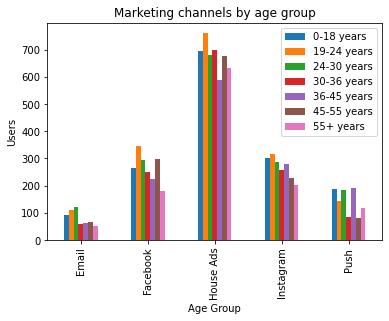

In [76]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

### Grouping and counting by multiple columns
Stakeholders have begun competing to see whose channel had the best retention rate from the campaign. You must first determine how many subscribers came from the campaign and how many of those subscribers have stayed on the service.

It's important to identify how each marketing channel is performing because this will affect company strategy going forward. If one channel is outperforming others, it might signal the channel merits further investment.

In [77]:
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Print results
print(retention_total.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [78]:
# Sum the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing.is_retained == True].groupby(['date_subscribed', 
                                                                   'subscribing_channel'])['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


### Analyzing retention rates for the campaign

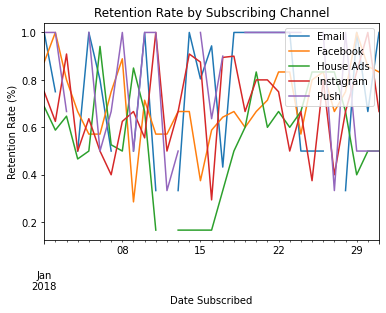

In [80]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(labels = retention_rate_df.columns.values, loc = 'upper right')
plt.show()

## Conversion Attribution


### Building a conversion function
You've been doing a lot of repetitive calculations. Anytime you notice repetition in your work, consider automation. The more of the low-variance work you can automate, the more time you will have to explore new and interesting data science topics at work. This will both impress your marketing stakeholders and be more fun!

In [82]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe.converted == True].groupby(column_names).user_id.nunique()

    # Total number users
    column_total = dataframe.groupby(column_names).user_id.nunique() 
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

### Test and visualize conversion function
Now that you've looked at conversion rate by age, you want to see if that trend has changed over time. Marketing has been changing their strategy and wants to make sure that their new method isn't alienating age groups that are less comfortable with their product. However, to do so, you need to create a plotting function to make it easier to visualize your results.

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
                              ...   
2018-01-31   24-30 years    0.057692
             30-36 years    0.000000
             36-45 years    0.035088
             45-55 years    0.023256
             55+ years      0.026316
Name: user_id, Length: 217, dtype: float64


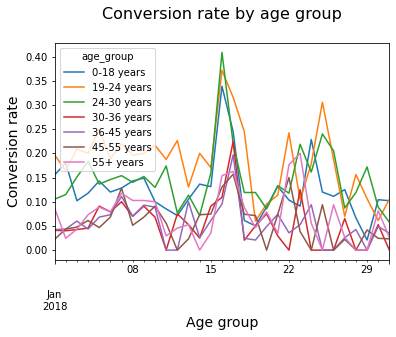

In [83]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(marketing, ['date_served', 'age_group'])
print(age_group_conv)

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

### Plotting function
To get uncluttered individual graphs for analysis.

In [84]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show()
        plt.clf()

### Putting it all together
Your marketing stakeholders have requested a report of the daily conversion rate for each age group, and they need it as soon as possible. They want you to refresh this report on a monthly cadence. This is a perfect opportunity to utilize your functions. Not only will the functions help you get this report out promptly today, but it will also help each month when it's time for a refresh of the data.

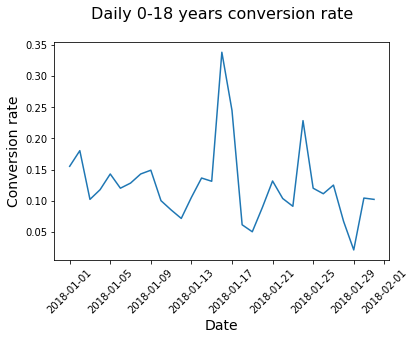

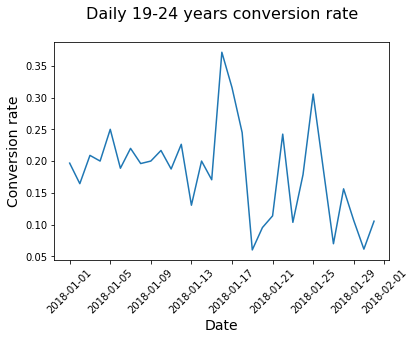

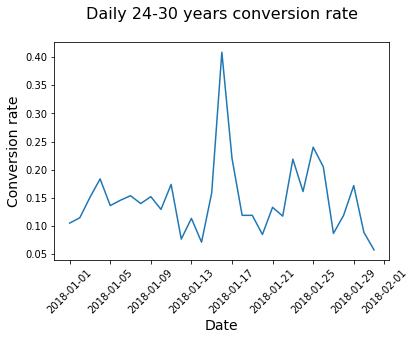

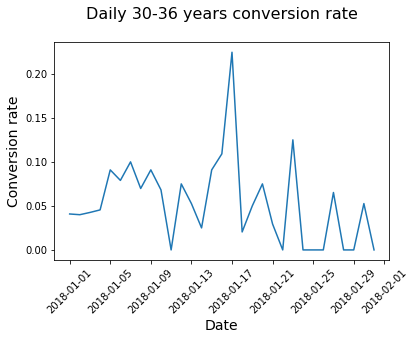

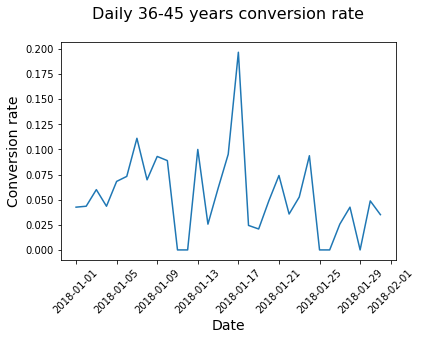

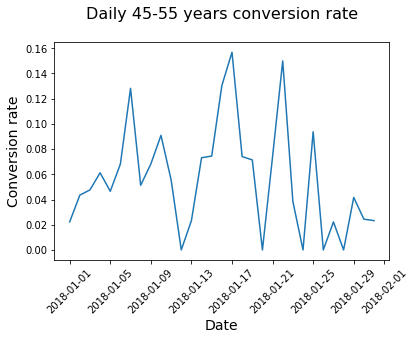

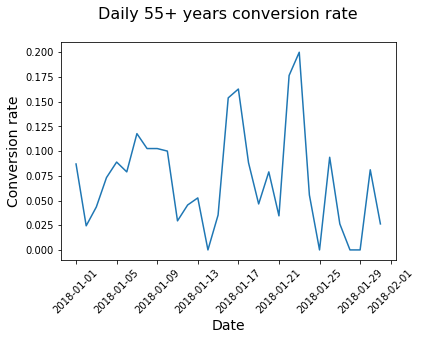

<Figure size 432x288 with 0 Axes>

In [23]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(marketing, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

##Gives a indivdual plot for all age groups since the unstacking was done at age_group level

### House ads conversion rate
The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation.

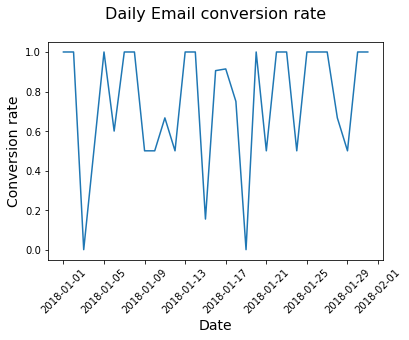

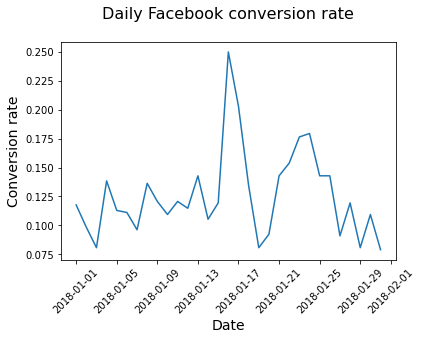

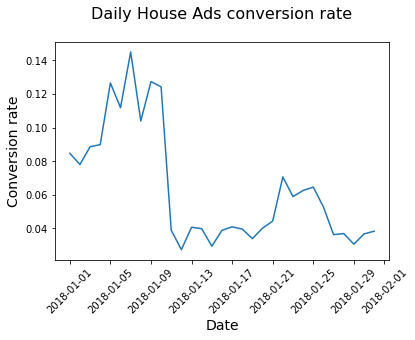

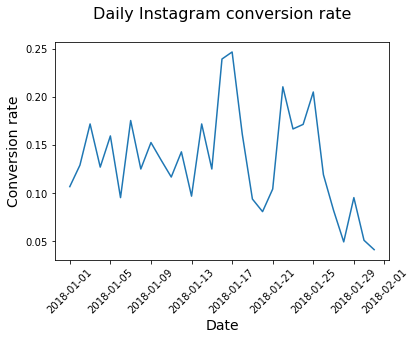

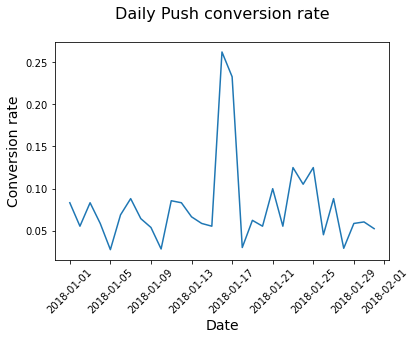

<Figure size 432x288 with 0 Axes>

In [85]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(marketing, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

### Analyzing House ads conversion rate
The house ads team has become worried about some irregularities they've noticed in conversion rate. It is common for stakeholders to come to you with concerns they've noticed around changing metrics. As a data scientist, it's your job to determine whether these changes are natural fluctuations or if they require further investigation

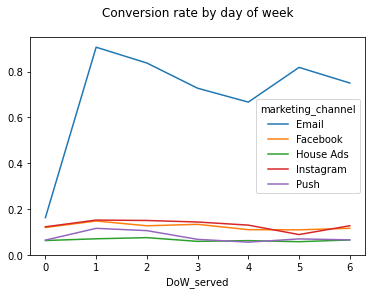

In [87]:
# Add day of week column to channel_marketing
marketing['DoW_served'] = marketing['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(marketing, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

email is particularly high and may be reflective of a tracking error, but house ads appear stable across the week with a slight peak on Tuesday

### House ads conversion by language
Now that you've ruled out natural fluctuations across the day of the week a user saw our marketing assets as they cause for decreasing house ads conversion, you will take a look at conversion by language over time. Perhaps the new marketing campaign does not apply broadly across different cultures.

Ideally, the marketing team will consider cultural differences prior to launching a campaign, but sometimes mistakes are made, and it will be your job to identify the cause. Often data scientists are the first line of defense to determine what went wrong with a marketing campaign. It's your job to think creatively to identify the cause.

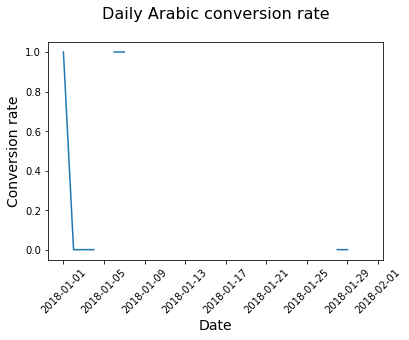

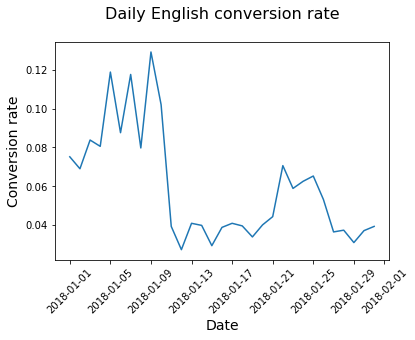

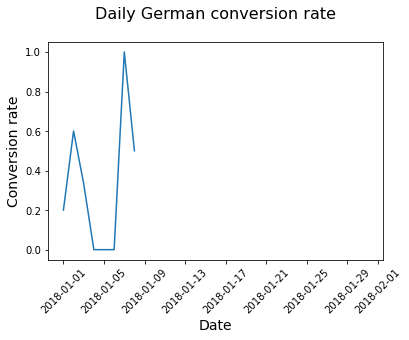

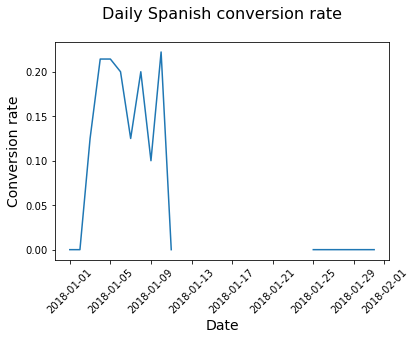

<Figure size 432x288 with 0 Axes>

In [88]:
# Isolate the rows where marketing channel is House Ads
house_ads = marketing[marketing.marketing_channel == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served',  'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

 As observed, the English conversion rate drops around the 11th, and there do not appear to be ads served in other languages for a two week period.

### Creating a DataFrame for house ads
The house ads team is concerned because they've seen their conversion rate drop suddenly in the past few weeks. In the previous exercises, you confirmed that conversion is down because you noticed a pattern around language preferences.

As a data scientist, it is your job to provide your marketing stakeholders with as specific feedback as possible as to what went wrong to maximize their ability to correct the problem. It is vital that you not only say "looks like there's a language problem," but instead identify what the problem is specifically so that the team doesn't repeat their mistake

In [91]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df.head())

is_correct_lang   No    Yes
date_served                
2018-01-01       2.0  189.0
2018-01-02       3.0  247.0
2018-01-03       0.0  220.0
2018-01-04       0.0  168.0
2018-01-05       0.0  160.0


<ipython-input-91-c2a4d0aaf417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


### Confirming house ads error
Calculating what percentage of users were not being served ads in the right language and plotting the results

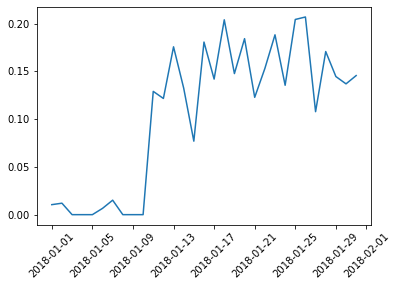

In [92]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['No']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()



Calculating what percentage of users were being served ads in the right language and plotting the results

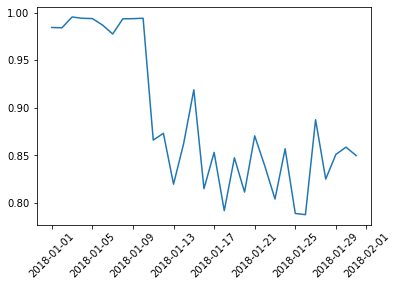

In [95]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 45)
plt.show()

It is clear that house ads have been underperforming due to serving all ads in English rather than each user's preferred language

### Setting up conversion indexes
Now that you've determined that language is, in fact, the issue with House Ads conversion, stakeholders need to know how many subscribers they lost as a result of this bug.

In [96]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


Now that i've created indexes for each language compared with English, you can assess what conversion rate should have been during the rest of the month.

### Analyzing user preferences

To understand the true impact of the bug, it is crucial to determine how many subscribers we would have expected had there been no language error. This is crucial to understanding the scale of the problem and how important it is to prevent this kind of error in the future.

Next here we are calculating the total number of users and actual conversions each day


In [98]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred']).agg({'user_id':'nunique','converted':'sum'})
pd.set_option('precision', 0)
# Unstack converted
converted = pd.DataFrame(converted.unstack(level=1))
converted.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01               2     171      5      11         2      13      1   
2018-01-02               3     200      5      10         0      14      3   
2018-01-03               2     179      3       8         0      15      1   
2018-01-04               2     149      2      14         0      12      0   
2018-01-05             NaN     143      1      14       NaN      17  False   

                            
language_preferred Spanish  
date_served                 
2018-01-01               0  
2018-01-02               0  
2018-01-03               1  
2018-01-04               3  
2018-01-05               3

### Creating a DataFrame based on indexes

Now that you've created an index to compare English conversion rates against all other languages, you will build out a DataFrame that will estimate what daily conversion rates should have been if users were being served the correct language.

An expected conversion DataFrame named converted has been created for you grouping house_ads by date and preferred language. It contains a count of unique users as well as the number of conversions for each language, each day.

In [99]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]

### Assessing bug impact
It's time to calculate how many subscribers were lost due to mistakenly serving users English rather than their preferred language. Once the team has an estimate of the impact of this error, they can determine whether it's worth putting additional checks in place to avoid this in the future—you might be thinking, of course, it's worth it to try to prevent errors! In a way, you're right, but every choice a company makes requires work and funding. The more information your team has, the better they will be able to evaluate this trade-off.

In [100]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11': '2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted['converted', 'Spanish'].sum() +converted['converted', 'Arabic'].sum() + converted['converted', 'German'].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(int(lost_subs))

32


## Personalization A/B Test

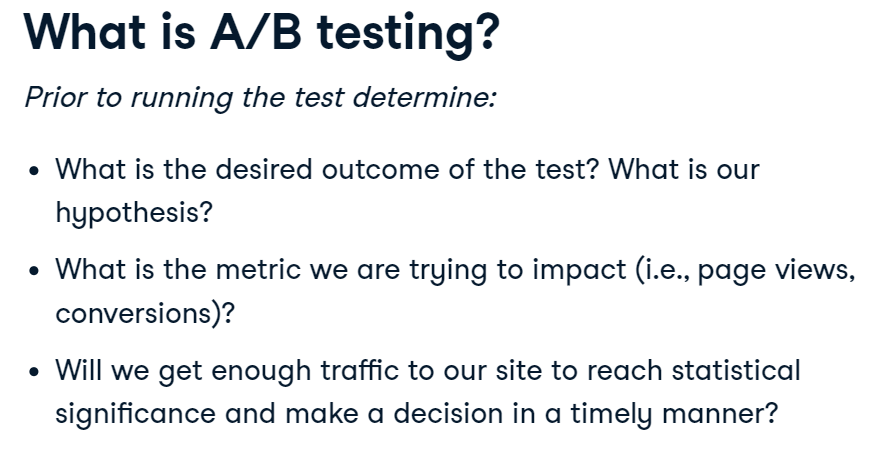

### Test allocation
The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

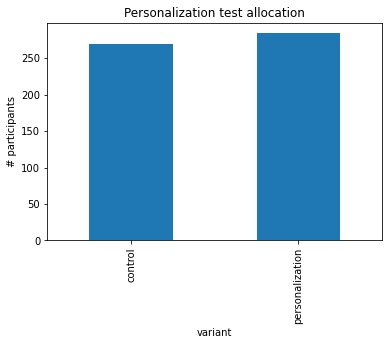

In [102]:
# Subset the DataFrame
email = marketing[marketing.marketing_channel ==  'Email']

# Group the email DataFrame by variant 
alloc = email.groupby('variant').user_id.nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = 'bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

### Comparing conversion rates
Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test

In [103]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant']).converted.max() 
#Here we used max function since converted col is bool and we are interested only in the converted ones
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

print(subscribers_df)
# Drop missing values from the control column
control = subscribers_df.control.dropna()

# Drop missing values from the personalization column
personalization = subscribers_df.personalization.dropna()

print('Control conversion rate:', control.mean())
print('Personalization conversion rate:', personalization.mean())

variant    control personalization
user_id                           
a100000526     NaN            True
a100000530     NaN            True
a100000534     NaN           False
a100000538     NaN            True
a100000542     NaN            True
...            ...             ...
a100007288    True             NaN
a100007289    True             NaN
a100007290    True             NaN
a100007291    True             NaN
a100007293    True             NaN

[553 rows x 2 columns]
Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### Creating a lift function
Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:
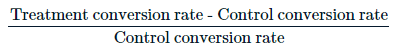

In [104]:
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean  - a_mean)/ a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


### Evaluating statistical significance
Now that you know the personalization variant outperformed the control, it's time for you to determine whether the result is statistically significant. Remember, statistical significance is vital to understanding whether a test showed a positive result by chance or if it is reflective of a true difference between the variants. This will enable your marketing team to make an informed choice about whether to roll out the feature or not.

In [105]:
from scipy import stats
stats.ttest_ind(control, personalization)

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)

Yes the test is statistically significant as pvalue << 0.05. So we have significance level > 95%

### Building an A/B test segmenting function
Your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

Since you want to segment our data multiple times, you will build a function ab_segmentation() that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

In [106]:
def ab_segmentation(segment):
  # Build a for loop for each subsegment in marketing
  for subsegment in np.unique(marketing[segment]):
      print(subsegment)
      
      # Limit marketing to email and subsegment
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization)) 
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [107]:
ab_segmentation('language_displayed')


Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [108]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




Found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.